Project: Conditional Probability Analysis
Course: Mathematics for Data Science
Author: Omer Zaman
Date: 12 April 2025

Goal:
- Generate Data (40,000 for age values)
- Purchasing Decision (Randomised)
- Check weighted purhcases by assigning a probability based on age and calculate it's Conditional Probability (learn this)
- Check weightless pruchases 
- Visualize the two via graph
- Analyze

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# For reproducibility when the professor or I are testing the code
np.random.seed(50)

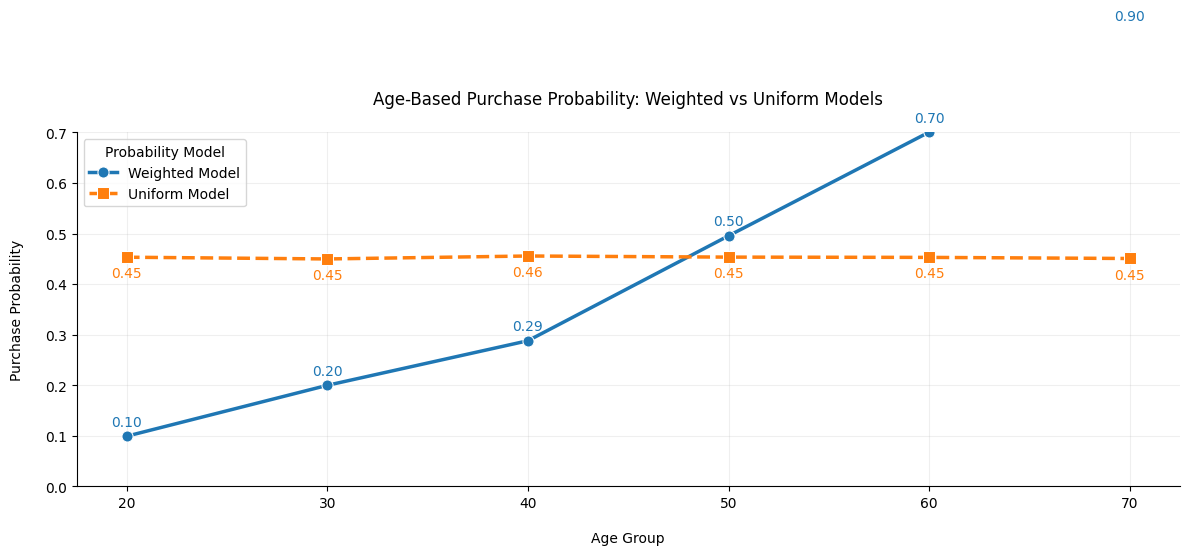

Key Results:
Weighted P(Purchase|70): 90.18%
Uniform P(Purchase|70): 45.07%


In [ ]:
ages = np.random.choice([20, 30, 40, 50, 60, 70], size=40000)
df = pd.DataFrame({'Age': ages})

# 2. Weighted Probability Model
age_weights = {20: 0.1, 30: 0.2, 40: 0.3, 50: 0.5, 60: 0.7, 70: 0.9}
df['Weighted_Purchase'] = df['Age'].map(age_weights).apply(lambda p: np.random.binomial(1, p))

# 3. Uniform Probability Model
uniform_prob = df['Weighted_Purchase'].mean()
df['Uniform_Purchase'] = np.random.binomial(1, uniform_prob, size=len(df))

# 4. Data Preparation for Plotting
def prepare_line_data(df, column):
    return (df.groupby('Age')[column].mean()
            .reset_index()
            .rename(columns={column: 'Probability'}))

weighted_curve = prepare_line_data(df, 'Weighted_Purchase')
uniform_curve = prepare_line_data(df, 'Uniform_Purchase')

# 5. Line Graph Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=weighted_curve, x='Age', y='Probability', 
             marker='o', color='#1f77b4', linewidth=2.5, 
             markersize=8, label='Weighted Model')
sns.lineplot(data=uniform_curve, x='Age', y='Probability', 
             marker='s', color='#ff7f0e', linewidth=2.5,
             markersize=8, linestyle='--', label='Uniform Model')

plt.title('Age-Based Purchase Probability: Weighted vs Uniform Models', pad=20)
plt.xlabel('Age Group', labelpad=15)
plt.ylabel('Purchase Probability', labelpad=15)
plt.ylim(0, 0.7)
plt.xticks([20, 30, 40, 50, 60, 70])
plt.grid(alpha=0.2)
plt.legend(title='Probability Model', loc='upper left')

# Add data labels
for x, y in zip(weighted_curve['Age'], weighted_curve['Probability']):
    plt.text(x, y+0.02, f'{y:.2f}', ha='center', color='#1f77b4')
for x, y in zip(uniform_curve['Age'], uniform_curve['Probability']):
    plt.text(x, y-0.04, f'{y:.2f}', ha='center', color='#ff7f0e')

sns.despine()
plt.tight_layout()
plt.savefig('line_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Results Output
print("Key Results:")
print(f"Weighted P(Purchase|70): {weighted_curve[weighted_curve['Age'] == 70]['Probability'].values[0]:.2%}")
print(f"Uniform P(Purchase|70): {uniform_curve[uniform_curve['Age'] == 70]['Probability'].values[0]:.2%}")
